# CLASIFICACION DE IMAGENES, MNIST

## 1- Primer Modelo 

**Preparación del entorno, importación de la biblioteca keras y descarga del dataset MNiST**


In [2]:
%tensorflow_version 2.x  #se selecciona la versión de tensorflow

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
import tensorflow.keras as keras  #importar la biblioteca keras, una red neuronal sencilla
mnist=keras.datasets.mnist  

ModuleNotFoundError: No module named 'tensorflow'

In [0]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()   #carga de datos

In [0]:
x_train,x_test= x_train/255,x_test/255   #se normalizan los datos (dividio por 255 el valor máximo de uint8)

**Codificación one-hot**

Se cambia la codificación a one-hot para que los datos de salida sean 10 categorías con valores de 0 a 1. En lugar de una categoría con valores posibles de 0 a 9.


In [0]:
n_clases=10
y_train_onehot=keras.utils.to_categorical(y_train,n_clases)
y_test_onehot=keras.utils.to_categorical(y_test,n_clases)


In [0]:
model = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model.add(keras.layers.Dense(64,activation='relu'))   #Segunda capa: Dense, contiene 64 neuronas con función de activación ReLu.
model.add(keras.layers.Dense(10,activation='softmax'))   #Última capa: contiene 10 neuronas de salida, con función de activación softmax (de acuerdo a la función que se usó para la codificación de las etiquetas)


**Se define algoritmo de entrenamiento: descenso por gradiente**

In [0]:
sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

**Comprobamos la arquitectura que se ha programado:**


In [44]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


Se observa que la capa oculta tiene 784 x 64 + 64=50240 parámetros, correspondientes a los pesos de cada conexión con las entradas y los 64 bias de las neuronas.

La capa de salida tiene 64 x 10 +10 = 650 parámetros.

Por lo tanto, en esta red sencilla, ya se tienen un total de 50890 parámetros que ajustar durante el entrenamiento.

**Entrenamiento de la red**

In [9]:
history=model.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=8,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3155 - accuracy: 0.9089 - val_loss: 0.1916 - val_accuracy: 0.9428
Epoch 2/8
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1624 - accuracy: 0.9529 - val_loss: 0.1362 - val_accuracy: 0.9595
Epoch 3/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1208 - accuracy: 0.9653 - val_loss: 0.1099 - val_accuracy: 0.9669
Epoch 4/8
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.1052 - val_accuracy: 0.9678
Epoch 5/8
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0829 - accuracy: 0.9751 - val_loss: 0.0970 - val_accuracy: 0.9699
Epoch 6/8
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.0840 - val_accuracy: 0.9732
Epoch 7/8
60000/60000 [==============================] - 5s 8

Error: loss, en entrenamiento.

Precisión: accuray, en entrenamiento.

Error de validación: val_loss

Precisión de validación: val_accuracy


Precisión final: 97,7% para los datos de validación (val_accuracy).

No hay sobreajuste ya que no llega a descender significativamente la precisión de validación, lo cual es señal de que la red está generalizando correctamente el aprendizaje.

La función de error es siempre decreciente y finalmente menor que la de validación.

In [0]:
import matplotlib.pyplot as plt



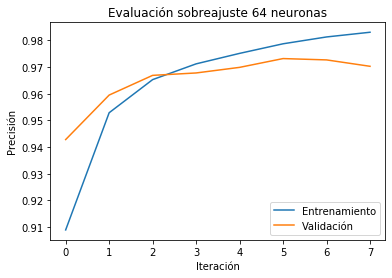

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Evaluación sobreajuste 64 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()


Se obtiene una precisión del 97,41%.

## 2- Modelos varios (neuronas adicionales)

**Modelo con 2 neuronas:**

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 82us/sample - loss: 1.4989 - accuracy: 0.4287 - val_loss: 1.1304 - val_accuracy: 0.5817
Epoch 2/8
60000/60000 [==============================] - 5s 78us/sample - loss: 1.1008 - accuracy: 0.6305 - val_loss: 1.0761 - val_accuracy: 0.6553
Epoch 3/8
60000/60000 [==============================] - 5s 83us/sample - loss: 1.0518 - accuracy: 0.6536 - val_loss: 1.0520 - val_accuracy: 0.6644
Epoch 4/8
60000/60000 [==============================] - 5s 79us/sample - loss: 1.0390 - accuracy: 0.6576 - val_loss: 1.0251 - val_accuracy: 0.6738
Epoch 5/8
60000/60000 [==============================] - 5s 79us/sample - loss: 1.0291 - accuracy: 0.6613 - val_loss: 1.0656 - val_accuracy: 0.6548
Epoch 6/8
60000/60000 [==============================] - 5s 80us/sample - loss: 1.0237 - accuracy: 0.6620 - val_loss: 1.0800 - val_accuracy: 0.6518
Epoch 7/8
60000/60000 [==============================] - 5s 78

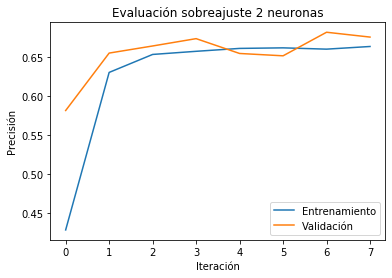

In [47]:
model2 = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model2.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model2.add(keras.layers.Dense(2,activation='relu'))   #Segunda capa: Dense, contiene 2 neuronas con función de activación ReLu.
model2.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model2.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2=model2.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=8,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Evaluación sobreajuste 2 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()


**Modelo con 32 neuronas**

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3320 - accuracy: 0.9038 - val_loss: 0.1987 - val_accuracy: 0.9415
Epoch 2/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1814 - accuracy: 0.9468 - val_loss: 0.1482 - val_accuracy: 0.9561
Epoch 3/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1408 - accuracy: 0.9586 - val_loss: 0.1363 - val_accuracy: 0.9589
Epoch 4/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1182 - accuracy: 0.9650 - val_loss: 0.1255 - val_accuracy: 0.9616
Epoch 5/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1042 - accuracy: 0.9686 - val_loss: 0.1066 - val_accuracy: 0.9676
Epoch 6/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0928 - accuracy: 0.9720 - val_loss: 0.1050 - val_accuracy: 0.9680
Epoch 7/8
60000/60000 [==============================] - 5s 79

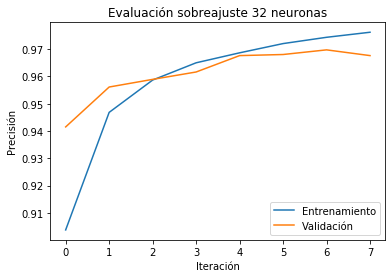

In [48]:
model32 = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model32.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model32.add(keras.layers.Dense(32,activation='relu'))   #Segunda capa: Dense, contiene 32 neuronas con función de activación ReLu.
model32.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model32.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history32=model32.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=8,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history32.history['accuracy'])
plt.plot(history32.history['val_accuracy'])
plt.title('Evaluación sobreajuste 32 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

**Modelo con 128 neuronas**

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3031 - accuracy: 0.9124 - val_loss: 0.1720 - val_accuracy: 0.9500
Epoch 2/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1452 - accuracy: 0.9575 - val_loss: 0.1300 - val_accuracy: 0.9605
Epoch 3/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1038 - accuracy: 0.9701 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 4/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0859 - val_accuracy: 0.9732
Epoch 5/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0677 - accuracy: 0.9802 - val_loss: 0.0784 - val_accuracy: 0.9748
Epoch 6/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.0782 - val_accuracy: 0.9750
Epoch 7/8
60000/60000 [==============================] - 5s 80

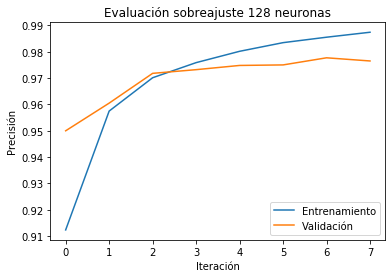

In [49]:
model128 = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model128.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model128.add(keras.layers.Dense(128,activation='relu'))   #Segunda capa: Dense, contiene 128 neuronas con función de activación ReLu.
model128.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model128.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history128=model128.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=8,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history128.history['accuracy'])
plt.plot(history128.history['val_accuracy'])
plt.title('Evaluación sobreajuste 128 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

**Modelo con 256 neuronas**

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2875 - accuracy: 0.9176 - val_loss: 0.1605 - val_accuracy: 0.9539
Epoch 2/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1335 - accuracy: 0.9615 - val_loss: 0.1144 - val_accuracy: 0.9663
Epoch 3/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0939 - accuracy: 0.9729 - val_loss: 0.0940 - val_accuracy: 0.9718
Epoch 4/8
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0728 - accuracy: 0.9792 - val_loss: 0.0807 - val_accuracy: 0.9752
Epoch 5/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0586 - accuracy: 0.9832 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 6/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0486 - accuracy: 0.9860 - val_loss: 0.0760 - val_accuracy: 0.9768
Epoch 7/8
60000/60000 [==============================] - 5s 80

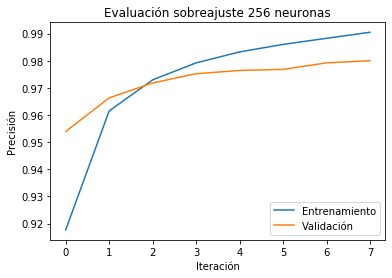

In [51]:
model256 = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model256.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 256 neuronas con función de activación ReLu.
model256.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model256.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256=model256.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=8,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256.history['accuracy'])
plt.plot(history256.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

**Modelo con 512 neuronas**

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2823 - accuracy: 0.9194 - val_loss: 0.1510 - val_accuracy: 0.9556
Epoch 2/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1294 - accuracy: 0.9625 - val_loss: 0.1074 - val_accuracy: 0.9681
Epoch 3/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0903 - accuracy: 0.9745 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 4/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0850 - val_accuracy: 0.9739
Epoch 5/8
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0548 - accuracy: 0.9842 - val_loss: 0.0687 - val_accuracy: 0.9789
Epoch 6/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0445 - accuracy: 0.9879 - val_loss: 0.0665 - val_accuracy: 0.9793
Epoch 7/8
60000/60000 [==============================] - 5s 83

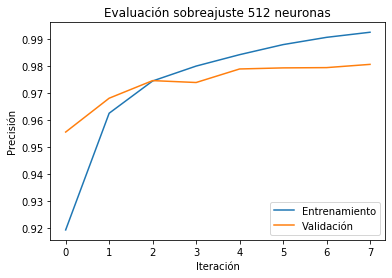

In [52]:
model512 = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model512.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model512.add(keras.layers.Dense(512,activation='relu'))   #Segunda capa: Dense, contiene 512 neuronas con función de activación ReLu.
model512.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model512.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history512=model512.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=8,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history512.history['accuracy'])
plt.plot(history512.history['val_accuracy'])
plt.title('Evaluación sobreajuste 512 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

## 3- Red y/o entrenamiento más complejos con overfitting.


Se observa en el apartado anterior con las redes de 128, 256 y 512 neuronas. 

Se repite el entrenamiento en la red con 256 neuronas y agregando iteraciones a 16, aumentando el overfitting:

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2904 - accuracy: 0.9166 - val_loss: 0.1553 - val_accuracy: 0.9537
Epoch 2/16
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1351 - accuracy: 0.9606 - val_loss: 0.1137 - val_accuracy: 0.9640
Epoch 3/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0937 - accuracy: 0.9723 - val_loss: 0.0991 - val_accuracy: 0.9692
Epoch 4/16
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0732 - accuracy: 0.9789 - val_loss: 0.0784 - val_accuracy: 0.9768
Epoch 5/16
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.0756 - val_accuracy: 0.9763
Epoch 6/16
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0482 - accuracy: 0.9866 - val_loss: 0.0693 - val_accuracy: 0.9786
Epoch 7/16
60000/60000 [==============================] 

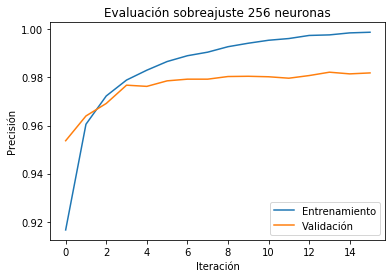

In [53]:
model256 = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model256.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 256 neuronas con función de activación ReLu.
model256.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model256.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256=model256.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=16,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256.history['accuracy'])
plt.plot(history256.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

## 4- Modelos con dropout


Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3426 - accuracy: 0.8987 - val_loss: 0.1545 - val_accuracy: 0.9535
Epoch 2/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1768 - accuracy: 0.9473 - val_loss: 0.1122 - val_accuracy: 0.9658
Epoch 3/16
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1399 - accuracy: 0.9586 - val_loss: 0.0958 - val_accuracy: 0.9708
Epoch 4/16
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1191 - accuracy: 0.9651 - val_loss: 0.0848 - val_accuracy: 0.9733
Epoch 5/16
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1056 - accuracy: 0.9674 - val_loss: 0.0760 - val_accuracy: 0.9780
Epoch 6/16
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0924 - accuracy: 0.9725 - val_loss: 0.0744 - val_accuracy: 0.9762
Epoch 7/16
60000/60000 [==============================] 

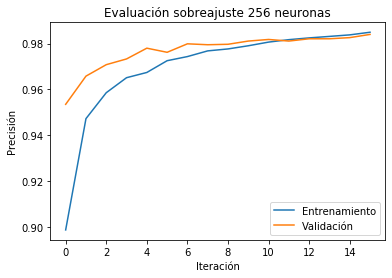

In [54]:
model256 = keras.models.Sequential()                      #se define modelo como secuencial, se añaden las sucesivas capas:
model256.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 64 neuronas con función de activación ReLu.
model256.add(keras.layers.Dropout(0.4))
model256.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.SGD(lr=0.1)  #con tasa de aprendizaje de lr=0,1
model256.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256=model256.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=16,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256.history['accuracy'])
plt.plot(history256.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

Agregando una capa de Dropout, se alcanzó un mejor nivel de precisión en el dataset de validación (98,40%) y, además, se resolvió el problema del sobre ajuste ya que se observa que el modelo se ajusta de forma similar al conjunto de datos de validación respecto al de entrenamiento. 

## 5- Optimizadores

**Adam**

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2911 - accuracy: 0.9136 - val_loss: 0.1272 - val_accuracy: 0.9611
Epoch 2/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1450 - accuracy: 0.9568 - val_loss: 0.0935 - val_accuracy: 0.9709
Epoch 3/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1127 - accuracy: 0.9656 - val_loss: 0.0770 - val_accuracy: 0.9762
Epoch 4/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0951 - accuracy: 0.9703 - val_loss: 0.0712 - val_accuracy: 0.9785
Epoch 5/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0819 - accuracy: 0.9738 - val_loss: 0.0667 - val_accuracy: 0.9797
Epoch 6/16
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0725 - accuracy: 0.9765 - val_loss: 0.0650 - val_accuracy: 0.9809
Epoch 7/16
60000/60000 [==============================] 

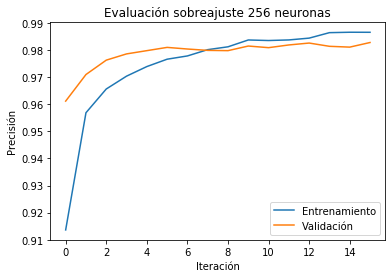

In [58]:
model256Adam = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model256Adam.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256Adam.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 64 neuronas con función de activación ReLu.
model256Adam.add(keras.layers.Dropout(0.4))
model256Adam.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,
                            epsilon=None,decay=0.0,amsgrad=False)  #con tasa de aprendizaje de lr=0,1
model256Adam.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256Adam=model256Adam.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=16,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256Adam.history['accuracy'])
plt.plot(history256Adam.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

**Adadelta**

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3032 - accuracy: 0.9109 - val_loss: 0.1544 - val_accuracy: 0.9537
Epoch 2/16
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1605 - accuracy: 0.9532 - val_loss: 0.1083 - val_accuracy: 0.9679
Epoch 3/16
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1275 - accuracy: 0.9624 - val_loss: 0.0979 - val_accuracy: 0.9715
Epoch 4/16
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1083 - accuracy: 0.9669 - val_loss: 0.0838 - val_accuracy: 0.9744
Epoch 5/16
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.0814 - val_accuracy: 0.9766
Epoch 6/16
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0898 - accuracy: 0.9733 - val_loss: 0.0750 - val_accuracy: 0.9786
Epoch 7/16
60000/60000 [==============================] 

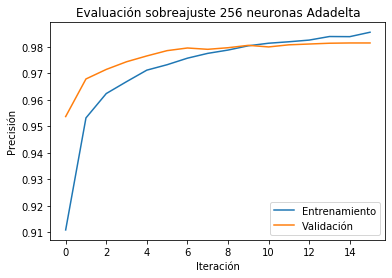

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Unrecognized location 'lower irght'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


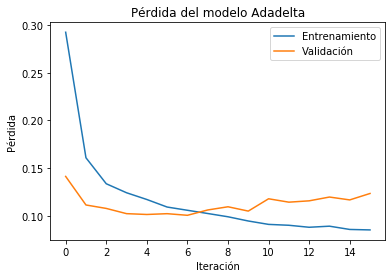

In [22]:
model256Adadelta = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model256Adadelta.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256Adadelta.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 64 neuronas con función de activación ReLu.
model256Adadelta.add(keras.layers.Dropout(0.4))
model256Adadelta.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
                            
model256Adadelta.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256Adadelta=model256Adadelta.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=16,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256Adadelta.history['accuracy'])
plt.plot(history256Adadelta.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas Adadelta')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

plt.plot(history256RMSprop.history['loss'])
plt.plot(history256RMSprop.history['val_loss'])
plt.title('Pérdida del modelo Adadelta')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento', 'Validación'], loc='lower irght')
plt.show()

**Adagrad**

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5071 - accuracy: 0.8567 - val_loss: 0.2675 - val_accuracy: 0.9287
Epoch 2/16
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2926 - accuracy: 0.9171 - val_loss: 0.2161 - val_accuracy: 0.9403
Epoch 3/16
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2414 - accuracy: 0.9311 - val_loss: 0.1823 - val_accuracy: 0.9494
Epoch 4/16
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2132 - accuracy: 0.9393 - val_loss: 0.1629 - val_accuracy: 0.9546
Epoch 5/16
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1903 - accuracy: 0.9464 - val_loss: 0.1492 - val_accuracy: 0.9588
Epoch 6/16
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1749 - accuracy: 0.9500 - val_loss: 0.1388 - val_accuracy: 0.9612
Epoch 7/16
60000/60000 [==============================] 

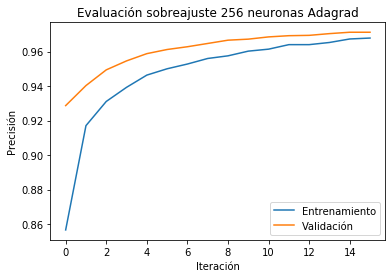

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Unrecognized location 'lower irght'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


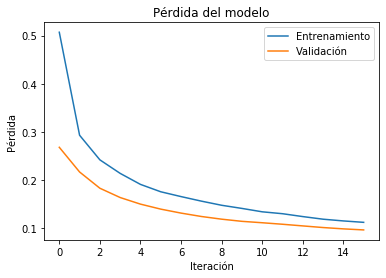

In [20]:
model256Adagrad = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model256Adagrad.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256Adagrad.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 64 neuronas con función de activación ReLu.
model256Adagrad.add(keras.layers.Dropout(0.4))
model256Adagrad.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
                            
model256Adagrad.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256Adagrad=model256Adagrad.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=16,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256Adagrad.history['accuracy'])
plt.plot(history256Adagrad.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas Adagrad')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

plt.plot(history256Adagrad.history['loss'])
plt.plot(history256Adagrad.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento', 'Validación'], loc='lower irght')
plt.show()

**RMSprop**

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2926 - accuracy: 0.9138 - val_loss: 0.1413 - val_accuracy: 0.9597
Epoch 2/16
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1609 - accuracy: 0.9543 - val_loss: 0.1113 - val_accuracy: 0.9696
Epoch 3/16
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1336 - accuracy: 0.9633 - val_loss: 0.1077 - val_accuracy: 0.9710
Epoch 4/16
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1241 - accuracy: 0.9681 - val_loss: 0.1022 - val_accuracy: 0.9761
Epoch 5/16
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1171 - accuracy: 0.9699 - val_loss: 0.1013 - val_accuracy: 0.9759
Epoch 6/16
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1091 - accuracy: 0.9726 - val_loss: 0.1022 - val_accuracy: 0.9764
Epoch 7/16
60000/60000 [=============================

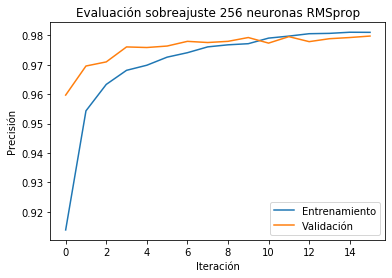

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Unrecognized location 'lower irght'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


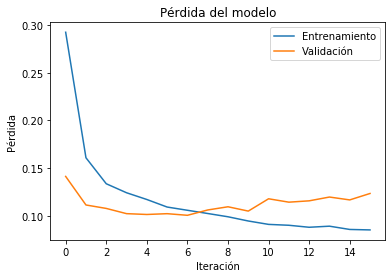

In [21]:
model256RMSprop = keras.models.Sequential()  #se define modelo como secuencial, se añaden las sucesivas capas:
model256RMSprop.add(keras.layers.Flatten(input_shape=(28,28)))   #Primera capa: flatten, toma la matriz de entrada 28,28 y la aplana a formato [784]
model256RMSprop.add(keras.layers.Dense(256,activation='relu'))   #Segunda capa: Dense, contiene 64 neuronas con función de activación ReLu.
model256RMSprop.add(keras.layers.Dropout(0.4))
model256RMSprop.add(keras.layers.Dense(10,activation='softmax')) 

sgd = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
                            
model256RMSprop.compile (optimizer=sgd,       # se compila el modelo indicando el optimizador recién definido, la función de error y la métrica para evaluar la red.
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history256RMSprop=model256RMSprop.fit(x_train, y_train_onehot, #Se indican los datos de entrenamiento
          epochs=16,                #número de pasadas por los datos de entrenamiento y los datos de validación.
          validation_data=(x_test,y_test_onehot))  #Se indican los datos de validación

plt.plot(history256RMSprop.history['accuracy'])
plt.plot(history256RMSprop.history['val_accuracy'])
plt.title('Evaluación sobreajuste 256 neuronas RMSprop')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

plt.plot(history256RMSprop.history['loss'])
plt.plot(history256RMSprop.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento', 'Validación'], loc='lower irght')
plt.show()